In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import pandas as pd

C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


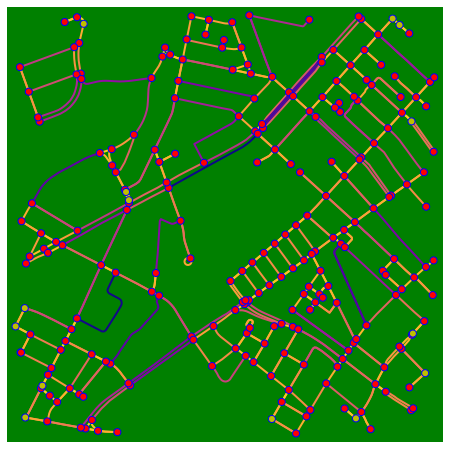

In [83]:
# Driving Distance Graph (G)

G=ox.graph_from_point((42.33833375,-71.08794164),dist=800,network_type='drive')
nc = ["r" if ox.simplification._is_endpoint(G, node) else "y" for node in G.nodes()]
ec = ox.plot.get_edge_colors_by_attr(G, attr="length", cmap="plasma_r")
fig, ax = ox.plot_graph(G,node_color=nc,bgcolor='g',node_edgecolor="b", node_size=50,edge_color=ec, edge_linewidth=2)

C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


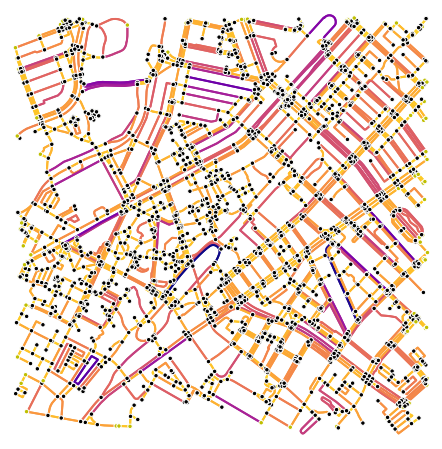

In [130]:
#Walking Distance Graph (W)

W=ox.graph_from_point((42.33833375,-71.08794164),dist=800,network_type='walk')
nc = ["k" if ox.simplification._is_endpoint(W, node) else "y" for node in W.nodes()]
ec = ox.plot.get_edge_colors_by_attr(W, attr="length", cmap="plasma_r")
fig, ax = ox.plot_graph(W,node_color=nc,bgcolor='w',node_edgecolor="w", node_size=20,edge_color=ec, edge_linewidth=2)

In [192]:
# Adding weight attribute to the driving route graph edges

for (u,v,k) in G.edges:
    k=G[u][v][0]['length']
    G[u][v][0]['weight']=k

In [202]:
# Adding weight attribute to the walking route graph edges

for (u,v,k) in W.edges:
    k=W[u][v][0]['length']
    W[u][v][0]['weight']=k

In [ ]:
# Random assignment of User Location coordinates

User1=61344397 # Camden Street
User5=61343519 #Davenport Street
User2=61382562 # Ruggles Street
User3=3053897512 #Shawmut Ave
User4=61412967 #Kerry Way

Users=[61342215,61342961,8038734866,4261060797]

Data Collection

In [222]:
# Loading Parking Space Data 

#Park=pd.read_excel("C:/Users/HP/anaconda3/PS1_F.xlsx")
#Park

In [223]:
# Loading Parking Space Data 

Park_F=pd.read_excel("C:/Users/HP/anaconda3/PS1_F1.xlsx")
Park_F

,Location,City,Distance,Price,u,v,Nodes
0,78 Opera Place,Boston,145,$2.50,42.340946,-71.089359,61423879
1,11 Forsyth Street,Boston,204,$2.50,42.340587,-71.090966,6234776596
2,13 Forsyth Street,Boston,170,$2.50,42.339936,-71.090833,6234776595
3,12 Forsyth St,Boston,165,$2.50,42.340082,-71.090724,6234776595
4,288 Huntington Avenue,Boston,149,$2.50,42.340754,-71.087626,61485036
5,77 Opera Place,Boston,148,$2.50,42.341003,-71.089254,61423879
6,224 Hemenway Street,Boston,244,$2.50,42.340353,-71.091613,6234776596
7,311 Huntington Avenue,Boston,235,$2.50,42.341322,-71.086917,61342673
8,"Northeastern University, Boston Campus - Matth...",Boston,309,$23.00,42.340706,-71.085265,61343394
9,"Northeastern University, Boston Campus - Gains...",Boston,298,$11.00,42.340615,-71.085362,61343394


In [136]:
# Loading Destination (Northeastern Building) Coordinates

NEU_B=pd.read_excel("C:/Users/HP/anaconda3/NC.xlsx")
NEU_B

,Buildings,latitude,longitude
0,B2 Dana Research Center (DA),42.338077,-71.089304
1,B1 Dockser Hall (DK),42.338680,-71.090495
2,C2 East Village (EV),42.061200,-71.864000
3,B2 Egan Research Center (EC),42.337656,-71.088946
4,C2 Ell Hall (EL),42.339362,-71.087800
5,D2 Fenway Center (FC),42.342087,-71.087969
6,B2 Forsyth Building (FR),42.338526,-71.089577
7,B2 Shillman Hall (SH),42.337618,-71.090138
8,B2 Snell Engineering Center (SN),42.338285,-71.088861
9,B2 Snell Library (SL),42.338334,-71.087942


Driving Route Calculation

In [141]:
# !!! The Dijkstra's Algorithm implementation !!!

In [234]:
from queue import PriorityQueue
from math import inf 
import networkx as nx
from collections import defaultdict

"""Dijkstra's shortest path algorithm"""
#finding the shortest path 
def Dijkstra(graph:'networkx.classes.graph.Graph', start: str, end: str) -> 'List':
    
    #Getting the shortest path of nodes by going backwards through prev list
    def backtrace(prev, start, end):
        #now we are assigning the node to the end point
        node = end
        path = []
        #checking if the node is equal tothe starting node,if so we are
        #appending it and updating the node to the previous node.
        while node != start: 
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        print(path)
        return path
    
    #getting  the cost of edges from node
    def cost(u, v):
        return graph.get_edge_data(u,v)[0].get('weight')
    
    
    #predecessor of current node on shortest path    
    prev = defaultdict(int)
    # initialize distances from start node
    dist = {v: inf for v in list(nx.nodes(graph))}
    # nodes which are  visited 
    visited = set()
    # elements stored as tuples (distance, node) 
    pq = PriorityQueue() 
    # dist from start node is zero
    dist[start] = 0 
    pq.put((dist[start], start))

    while 0 != pq.qsize():
        curr_cost, curr = pq.get()
        visited.add(curr)
        # checking for current adjacent nodes
        for neighbor in dict(graph.adjacency()).get(curr):
            path = dist[curr] + cost(curr, neighbor)
            # checking the condition and update the distance we found 
            if path < dist[neighbor]:
                dist[neighbor] = path
                # update the previous node to be prev on new shortest path
                prev[neighbor] = curr
                # if we haven't visited the neighbor
                if neighbor not in visited: 
                    # insert into priority queue and mark as visited
                    visited.add(neighbor)
                    pq.put((dist[neighbor],neighbor))
                # otherwise update the entry in the priority queue    
                else: 
                    _ = pq.get((dist[neighbor],neighbor))
                    pq.put((dist[neighbor],neighbor))   
    #return the shorest distance
    return dist.get(end)

In [235]:
#testing

Dijkstra(G,61343519,61423879) 

2149.5999999999995

In [138]:
# Calculating the distance to various Parking Space from the User's Location

In [139]:
# Finding nearest Parking Space  Nodes

def find_nodes(x):
    Parking_nodes=[]
    for index, row in x.iterrows():
        u=row['u']
        v=row['v']
        end = ox.get_nearest_node(G, (u,v), method='euclidean')
        Parking_nodes.append(end)
    return Parking_nodes
      
Parking_nodes=find_nodes(data1)    

In [ ]:
# Adding these nodes data to the pandas dataframe (Parking Space details)

In [149]:
# Finding nearest Northeastern Building Nodes from walking path graph

def find_nodes1(x):
    Building_nodes=[]
    for index, row in x.iterrows():
        u=row['latitude']
        v=row['longitude']
        dest = ox.get_nearest_node(W, (u,v), method='euclidean')
        Building_nodes.append(dest)
    return Building_nodes
      
Building_nodes=find_nodes1(NEU_B)    

[6370402903,
 2152582222,
 6538740178,
 1185732777,
 3884213656,
 8752743099,
 3884213649,
 1914681355,
 3884213650,
 2295014947,
 7212591218,
 7746155480,
 1021955286,
 9688845527,
 8752759539]

In [ ]:
# Adding Nodes to the NEU_B dataframe

In [150]:
NEU_B1=pd.read_excel("C:/Users/HP/anaconda3/NC_F.xlsx")
NEU_B1

,Buildings,latitude,longitude,Nodes1
0,B2 Dana Research Center (DA),42.338077,-71.089304,6370402903
1,B1 Dockser Hall (DK),42.338680,-71.090495,2152582222
2,C2 East Village (EV),42.061200,-71.864000,6538740178
3,B2 Egan Research Center (EC),42.337656,-71.088946,1185732777
4,C2 Ell Hall (EL),42.339362,-71.087800,3884213656
5,D2 Fenway Center (FC),42.342087,-71.087969,8752743099
6,B2 Forsyth Building (FR),42.338526,-71.089577,3884213649
7,B2 Shillman Hall (SH),42.337618,-71.090138,1914681355
8,B2 Snell Engineering Center (SN),42.338285,-71.088861,3884213650
9,B2 Snell Library (SL),42.338334,-71.087942,2295014947


In [ ]:
# Final Output based on user Input

In [ ]:
# Getting User input on the destination they wish to go
  ##Assuming User location as 61371928 [Main]   {61344397 (Camden Street)}

In [ ]:
# Let's say user wants to go to C2 Ell Hall (EL) (3884213656)

In [224]:
# Final Output based upon which user can decide the suitable option

#Each key in the dictionary is a Parking Space Location and the values are - driving distance,walking distanceand the Price. 

In [225]:
walk={}
for index, row in Park_F.iterrows():
    User1=61371928
    dest=3884213656
    g=row['Nodes']
    t=dijkstra(G,User1,g)
    p=dijkstra(W,g,dest)
    y=round((t/1609.344),2)
    x=round((p/1609.344),2)
    t=row['Location']
    w=row['Price']
    walk[t]=[y,x,w]

{'78 Opera Place': [1.14, 0.12, '$2.50'],
 '11 Forsyth Street': [1.07, 0.25, '$2.50'],
 '13 Forsyth Street': [1.12, 0.26, '$2.50'],
 '12 Forsyth St': [1.12, 0.26, '$2.50'],
 '288 Huntington Avenue': [0.99, 0.14, '$2.50'],
 '77 Opera Place': [1.14, 0.12, '$2.50'],
 '224 Hemenway Street': [1.07, 0.25, '$2.50'],
 '311 Huntington Avenue': [1.0, 0.24, '$2.50'],
 'Northeastern University, Boston Campus - Matthews Lot': [0.93,
  0.2,
  '$23.00'],
 'Northeastern University, Boston Campus - Gainsborough Garage': [0.93,
  0.2,
  '$11.00'],
 'Northeastern University - Renaissance Park Garage': [0.35, 0.41, '$11.00'],
 'Forsythe Way': [0.89, 0.32, '$2.50'],
 '114 Edgerly Rd': [0.98, 0.45, '$2.50'],
 'Westland Avenue Garage': [1.03, 0.5, '$8.00']}

In [229]:
Parking_options = pd.DataFrame(list(walk.items()),columns = ['Parking Space','Drive Dist , Walk Dist , Price'])
Parking_options

,Parking Space,"Drive Dist , Walk Dist , Price"
0,78 Opera Place,"[1.14, 0.12, $2.50]"
1,11 Forsyth Street,"[1.07, 0.25, $2.50]"
2,13 Forsyth Street,"[1.12, 0.26, $2.50]"
3,12 Forsyth St,"[1.12, 0.26, $2.50]"
4,288 Huntington Avenue,"[0.99, 0.14, $2.50]"
5,77 Opera Place,"[1.14, 0.12, $2.50]"
6,224 Hemenway Street,"[1.07, 0.25, $2.50]"
7,311 Huntington Avenue,"[1.0, 0.24, $2.50]"
8,"Northeastern University, Boston Campus - Matth...","[0.93, 0.2, $23.00]"
9,"Northeastern University, Boston Campus - Gains...","[0.93, 0.2, $11.00]"


In [ ]:
# **************** Project Ends *********************

In [233]:
W[3884213656]

AdjacencyView({3884213655: {0: {'osmid': 385064992, 'tunnel': 'yes', 'highway': 'footway', 'oneway': False, 'length': 35.35, 'weight': 35.35}}, 3884213654: {0: {'osmid': 385064992, 'tunnel': 'yes', 'highway': 'footway', 'oneway': False, 'length': 59.269, 'weight': 59.269}}, 2297137065: {0: {'osmid': 385064993, 'tunnel': 'yes', 'highway': 'footway', 'oneway': False, 'length': 9.539, 'weight': 9.539}}, 6252463632: {0: {'osmid': [385064993, 911553335], 'tunnel': 'yes', 'highway': 'footway', 'oneway': False, 'length': 49.275999999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x00000241E9E86BE0>, 'weight': 49.275999999999996}}})